In [1]:
import pandas as pd
import numpy as np


Reviews = pd.read_csv(r"C:\Users\ethan\OneDrive\Documents\Data Science\Reviews22.csv")

#part 4)

#Use regression algorithms to predict movie success (the factors you selected in Phase 2) based on the sentiment analysis 
#results and other relevant variables. (20 pts)


#####Notes for delivarable
#Will not need to use the sentiment analysis results columns as ivs because we used them in part 3 
#to further impute values into our dv which is the reviewer rating actual column

#1) predict, the impact of the predictor variables on the 2 dvs we used in part 2
        #we do not need to use the reviwer rating actual as an iv in revier rating actual b/c we used it as a dv. 
        #use reviewer rating actual as an iv when predicting ROI
        #We will need two seperate models, one for ROI, one for revier rating actual
        
#3) numerical analysis of your model results

        
#4) What are your major indings? IMPLICATIONS
#develop marketing strategies for a movie producer based on your findings in the other parts of the model predictions
#and the model fit results

#5)must submit both python script and csv 



from sklearn.linear_model import LinearRegression
! pip install statsmodels -U
import statsmodels.api as sm
!pip install bioinfokit
from bioinfokit.visuz import stat


#1 check linear relationship between dvs and ivs
#2 check missing values
    #NAs < 10% total obs ??
    #NAs > 10, impute mean is normal and impute median if skewed
#3 p-value <= 0.05 for statistically significant, two asterics
    # p-value <= 0.01 for statistically significant, three asterics
    


-0.9999999999999942
189.66666666660345
0
0
3.026375485508039
46213137.92911177 mean budget
35000000.0 median budget
-1.0
189.66666666666666
0
nan


C:\Users\ethan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


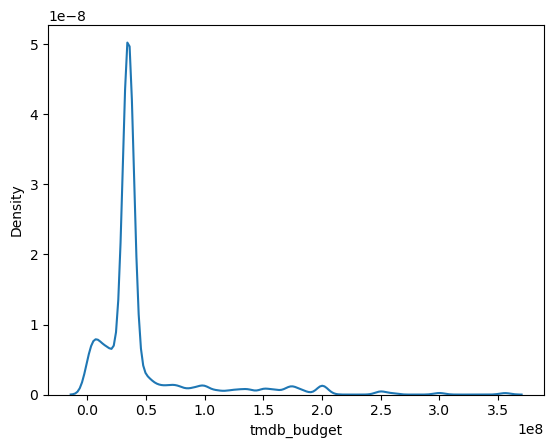

In [137]:
Reviews['ROI'] = (Reviews['tmdb_revenue'] - Reviews['tmdb_budget'])/Reviews['tmdb_budget']

Reviews["ROI2"] = ((Reviews["tmdb_revenue"]+0.000001)-(Reviews["tmdb_budget"]+0.000001))/(Reviews["tmdb_budget"]+0.000001)
print(min(Reviews['ROI2']))
print(max(Reviews['ROI2']))
#0.000001
print((Reviews['tmdb_budget'] == 0).sum()) #there are 53,112 values where the budget is 0
#we will need a way to transform the variable 
# Select all observations where tmdb_budget = 0
zero_budget = Reviews[Reviews['tmdb_budget'] == 0]

# Create a new DataFrame with the tmdb_budget and tmdb_revenue variables for each selected observation
#zero_budget = zero_budget[['tmdb_budget', 'tmdb_revenue']]
#print(zero_budget)

print(len(Reviews[(Reviews['tmdb_revenue'] != 0) & (Reviews['tmdb_budget'] == 0)])) 
#there are 11,148 observations where there is a zero value for budget and a non-zero value for revenue
#this will heavily change the ROI distributions because th denominator of ROI is budget
#A zero value of budget will return an inf
#we will need to fix this
#If we impute a small value (ie. 1) in the denominator then the ROI for these observations will essentially equal ROI, this is incorrect
#we will need to find the mean of tmdb_budget and impute this into the equation instead of the zero value


# Calculate the mean or median of tmdb_budget
sns.kdeplot(data=Reviews["tmdb_budget"])
print(stats.skew(Reviews["tmdb_budget"])) #there is high right skew at 2.7256
mean_budget = Reviews['tmdb_budget'].mean() #27,184,178.68
#median_budget = Reviews['tmdb_budget'].median()  #0, this could be a problem in our equation. There are 53,112 values of 0
median_budget = Reviews.loc[Reviews['tmdb_budget'] != 0, 'tmdb_budget'].median() #Ignore class 0 and used this instead, 35,000,000
print(mean_budget, "mean budget")
print(median_budget, "median budget")

# Create a new variable ROI3 based on the mean of tmdb_budget
Reviews['ROI3'] = (Reviews['tmdb_revenue'] - Reviews['tmdb_budget']) / Reviews['tmdb_budget']
Reviews.loc[Reviews['tmdb_budget'] == 0, 'ROI3'] = (Reviews['tmdb_revenue'] - median_budget) / median_budget

print(min(Reviews['ROI3'])) #-1
print(max(Reviews['ROI3'])) #189.67
print(Reviews['ROI3'].isna().sum()) #0


Reviews["ROI4"]= np.log(Reviews["ROI3"]+0.00001)
print(stats.skew(Reviews["ROI4"])) 

print(Reviews['ROI4'].isna().sum()) #there are 66312 na values

In [3]:
# count number of rows with infinite ROI value
num_inf_ROI2 = len(Reviews[Reviews['ROI2'] == float('inf')]) #there are inf values bc some movies do not list budget for ROI calculation
print(num_inf_ROI2)
Reviews.isna().sum()

0


index                          0
review_id                      0
critic_id                      0
created_date                   0
pub_date                       0
content                        0
publisher                      4
reviewer_rating_rotten         0
reviewer_rating_actual         0
reviewer rating           103677
tmeter                         0
review_src_url                 0
publication                    0
review_object_type             0
review_object_title            0
review_object_year             0
review_object_href             0
critic_name                    0
Unnamed: 0                     0
genres                      6827
budget                      5988
runtime                     6116
original_language           5988
tmdb_budget                 5988
tmdb_revenue                5988
release_date                6250
tmdb_popularity             5988
tmdb_vote_avg               5988
tmdb_vote_count             5988
tmdbid                      5988
compound  

In [80]:
#Checking NA values of predictors
print("Reviewer rating rotten NA: " + str(Reviews['reviewer_rating_rotten'].isna().sum()))
#0

print("tmeter NA: " + str(Reviews['tmeter'].isna().sum()))
#0

print("Unnamed: 0 NA: " + str(Reviews['Unnamed: 0'].isna().sum()))
#0 NA values

#defining secondary genre
def sec_genre(val):
    try:
        SecondGenre = val.split('|')[1]
        return SecondGenre
    except:
        return val

Reviews['Sec_genre'] = Reviews['genres'].apply(sec_genre)


print("secondary genre 0 NA: " + str(Reviews['Sec_genre'].isna().sum()))
#6827 NA values
print("Main_genre NA: " + str(Reviews['Main_genre'].isna().sum()))
# 6827 NA values - makes sense that both would be same

print("original_language NA: " + str(Reviews['original_language'].isna().sum()))
#5988 NA values

len(Reviews)


print("tmdb_budget NA:" + str(Reviews['tmdb_budget'].isna().sum())) #5988
print("runtime NA:" + str(Reviews['runtime'].isna().sum())) #6116
print("tmdb_revenue NA:" + str(Reviews['tmdb_revenue'].isna().sum())) #5988
print("release_date NA:" + str(Reviews['release_date'].isna().sum())) #6250
print("tmdb_popularity NA:" + str(Reviews['tmdb_popularity'].isna().sum())) #5988
print("tmdb_vote_avg NA:" + str(Reviews['tmdb_vote_avg'].isna().sum())) #5988
print("tmdb_vote_count NA:" + str(Reviews['tmdb_vote_count'].isna().sum())) #5988
print("ROI NA:" + str(Reviews['ROI'].isna().sum())) #41964
print("ROI2 NA:" + str(Reviews['ROI2'].isna().sum())) #41964)
#there are NA values in budget and zero values in budget which lead to a large number of inf and NA values of ROI
#we will remove 5988 observations, it is assumed that these observations have both NA values in tmdb_revenue and tmdb_budget


Reviewer rating rotten NA: 0
tmeter NA: 0
Unnamed: 0 NA: 0
secondary genre 0 NA: 839
Main_genre NA: 0
original_language NA: 0
tmdb_budget NA:0
runtime NA:0
tmdb_revenue NA:0
release_date NA:0
tmdb_popularity NA:0
tmdb_vote_avg NA:0
tmdb_vote_count NA:0
ROI NA:41964
ROI2 NA:0


In [81]:
#code to remove observations where the values of both tmdb_revenue and tmdb_budget are NA
Reviews = Reviews.dropna(subset=["tmdb_revenue", "tmdb_budget"], how="all")





print("original_language NA:" + str(Reviews['original_language'].isna().sum())) #0
print("tmdb_budget NA:" + str(Reviews['tmdb_budget'].isna().sum())) #0
print("runtime NA:" + str(Reviews['runtime'].isna().sum())) #128
print("tmdb_revenue NA:" + str(Reviews['tmdb_revenue'].isna().sum())) #0
print("release_date NA:" + str(Reviews['release_date'].isna().sum())) #262
print("tmdb_popularity NA:" + str(Reviews['tmdb_popularity'].isna().sum())) #0
print("tmdb_vote_avg NA:" + str(Reviews['tmdb_vote_avg'].isna().sum())) #0
print("tmdb_vote_count NA:" + str(Reviews['tmdb_vote_count'].isna().sum())) #0
print("Main_genre NA: " + str(Reviews['Main_genre'].isna().sum())) #839
print("secondary genre 0 NA: " + str(Reviews['Sec_genre'].isna().sum()))#839 NA values

#only runtime, release date, and genres have to have NA values removed now


original_language NA:0
tmdb_budget NA:0
runtime NA:0
tmdb_revenue NA:0
release_date NA:0
tmdb_popularity NA:0
tmdb_vote_avg NA:0
tmdb_vote_count NA:0
Main_genre NA: 0
secondary genre 0 NA: 839


In [82]:
#clean the release_date column
#impute NA values with the media date
# Convert the Release Date column to a pandas datetime object
#Reviews["release_date"] = pd.to_datetime(Reviews["release_date"], dayfirst=True)




Reviews['runtime'].fillna(value=Reviews['runtime'].mean(), inplace=True)
#replacing NA values with the mean

Reviews['Main_genre'].fillna(value=Reviews['Main_genre'].mode()[0], inplace=True)
##replacing NA values with the mode

Reviews['Sec_genre'].fillna(value=Reviews['Sec_genre'].mode()[0], inplace=True)
##replacing NA values with the mode

#clean the release_date column
#impute NA values with the media date
Reviews['release_date'] = pd.to_datetime(Reviews['release_date'])
Reviews['release_date'].fillna(value=Reviews['release_date'].mean(), inplace=True)
#replacing dates with the NA date.

print("runtime NA:" + str(Reviews['runtime'].isna().sum())) #0
print("release_date NA:" + str(Reviews['release_date'].isna().sum())) #0
print("Main_genre NA: " + str(Reviews['Main_genre'].isna().sum())) #0
print("secondary genre 0 NA: " + str(Reviews['Sec_genre'].isna().sum()))#0 NA values

#None of our predictor variables contain NA values

runtime NA:0
release_date NA:0
Main_genre NA: 0
secondary genre 0 NA: 0


1.907524873378049
-0.8628128281426014


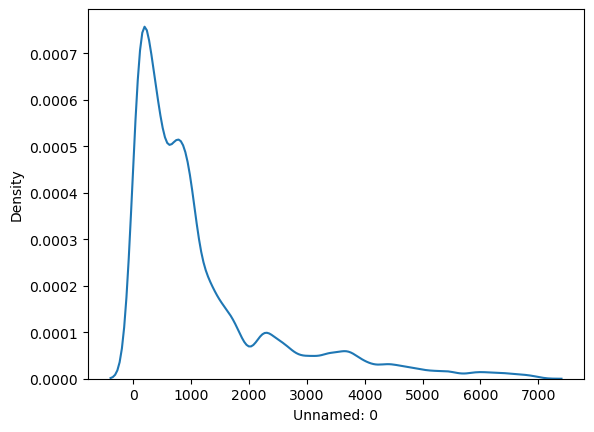

In [17]:
#Unnamed :0 variable anaylsis and cleaning
import seaborn as sns
import scipy.stats as stats

sns.kdeplot(data=Reviews["Unnamed: 0"])
print(stats.skew(Reviews["Unnamed: 0"])) 
#The skew of this variable is very high to the right, 1.9075

Reviews["Unnamed: 0 logged"] = np.log(Reviews["Unnamed: 0"])
print(stats.skew(Reviews["Unnamed: 0 logged"])) 
#The skew of this variable is better (-0.8628), it is still slightly skewed, skew to the left now

#the density plot shows that this variable is skewed and may need to be logged
#sns.kdeplot(data=Reviews["Unnamed: 0 logged"])

#Unsure of what the variable is interpreted as, it seems to be some type of ID variable and may not need to be included in the model

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


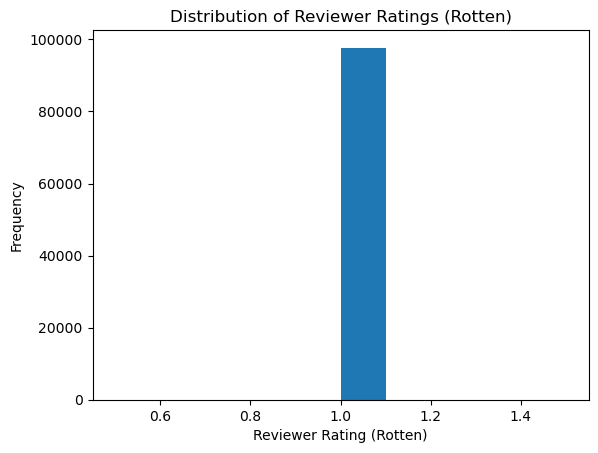

In [20]:
#Reviewer ratin rotten varibale analysis and cleaning
import matplotlib.pyplot as plt

#sns.countplot(x='reviewer_rating_rotten', data=Reviews)

plt.hist(Reviews['reviewer_rating_rotten'])

plt.xlabel('Reviewer Rating (Rotten)')
plt.ylabel('Frequency')
plt.title('Distribution of Reviewer Ratings (Rotten)')

plt.show()

#There are only values of "True", do not use this variable as a predictor

-2.7199227111848434
3112
0
-0.3420648382451127


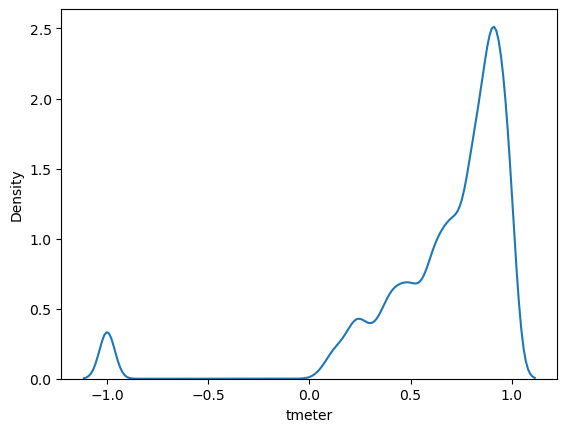

In [77]:
#Tmeter variable analysis and cleaning
sns.kdeplot(data=Reviews["tmeter"]) #the original density plot is highly skewed to the left
#there are values of -1 that heavily affect this 

print(stats.skew(Reviews["tmeter"])) #-2.7199, The is highly affected by the -1 values
#we should impute these values as 0 instead of -1
#It is interpreted that both a 0 and -1 value show that there are no positive reviews for a movie

print((Reviews['tmeter'] == -1).sum()) #3112
print((Reviews['tmeter'] == 0).sum()) #There are no observations where tmeter is equal to zero

Reviews['tmeter_cleaned'] = Reviews['tmeter'].replace(-1, 0)
#print(stats.skew(Reviews["tmeter_cleaned"])) #highly skewed left at -1, we will need to further transform the variable
Reviews['tmeter_cleaned'] = Reviews['tmeter_cleaned']**2
print(stats.skew(Reviews["tmeter_cleaned"])) #the new skew is -0.34


#sns.kdeplot(data=Reviews["tmeter_cleaned"])
#This variable is defined by Rotten Tomatoes as "The Tomatometer score represents the percentage of professional critic
#reviews that are positive for a given film or television show." A negative value will be interpretted that no reviews were
#positive for the movie. This density plot is bimodal with peaks around -1 and 0.7.



#there are multiple peaks so there 


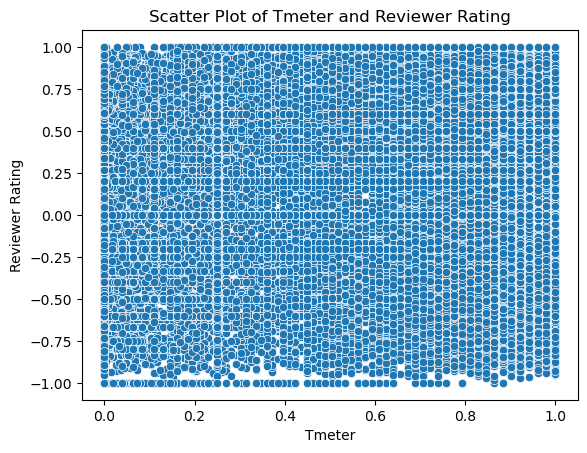

                        tmeter_cleaned  reviewer_rating_actual
tmeter_cleaned                1.000000                0.345296
reviewer_rating_actual        0.345296                1.000000


In [143]:
#A scatterplot of the tmeter scores against the dependent variable reviwer_rating_actual
sns.scatterplot(x='tmeter_cleaned', y='reviewer_rating_actual', data=Reviews)

plt.xlabel('Tmeter')
plt.ylabel('Reviewer Rating')
plt.title('Scatter Plot of Tmeter and Reviewer Rating')
plt.show()

#The scatter plot shows that there is no descernible pattern between the tmeter score and the reviewer_rating_actual col
print(Reviews[['tmeter_cleaned', 'reviewer_rating_actual']].corr())
#the correlation between the variables is 0.345296, they are not highly correlated


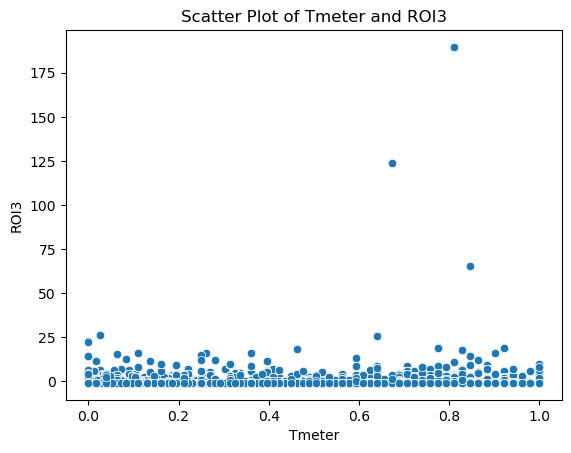

                tmeter_cleaned      ROI3
tmeter_cleaned        1.000000  0.023003
ROI3                  0.023003  1.000000


In [68]:
#A scatterplot of the tmeter scores against the dependent variable reviwer_rating_actual
sns.scatterplot(x='tmeter_cleaned', y='ROI3', data=Reviews)

plt.xlabel('Tmeter')
plt.ylabel('ROI3')
plt.title('Scatter Plot of Tmeter and ROI3')
plt.show()

#The scatter plot shows that there is no descernible pattern between the tmeter score and the reviewer_rating_actual col
print(Reviews[['tmeter_cleaned', 'ROI3']].corr())
#the correlation between the variables is 0.023003, they are not highly correlated
#there seems to be three observations with noticably higher ROI values than the others

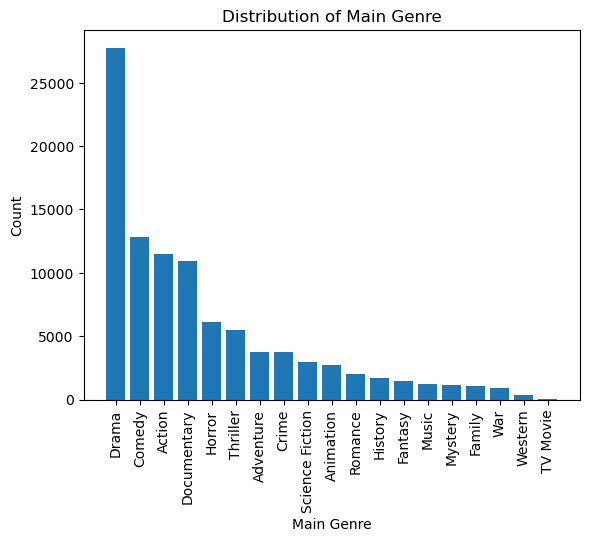

In [72]:
#Main_genre variable analysis and cleaning

genre_counts = Reviews['Main_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Main Genre')
plt.ylabel('Count')
plt.title('Distribution of Main Genre')
plt.xticks(rotation=90)
plt.show()

#This bar chart shows the counts of the different movei genres
#The most popular main genres of the produced movies are: Drama, Comedy, and Action
#The least popular main genres are: TV Movie, Western, and War

In [73]:
#Main Genre analysis against reviewer_rating_actual

mean_ratings_by_genre = Reviews.groupby('Main_genre')['reviewer_rating_actual'].mean()

# Create a table of mean reviewer_rating_actual values by Main_genre
print(mean_ratings_by_genre)

#This shows the average reviewer_rating_actual values based on the main_genre of a movie
#The table shows that the best permorfming main genres by reviewer_rating_actual are Western, Documentary, and History

Main_genre
Action             0.192049
Adventure          0.260802
Animation          0.246560
Comedy             0.219581
Crime              0.298253
Documentary        0.354591
Drama              0.306559
Family             0.168277
Fantasy            0.232293
History            0.321723
Horror             0.216896
Music              0.310829
Mystery            0.245474
Romance            0.233791
Science Fiction    0.183084
TV Movie           0.229682
Thriller           0.189855
War                0.311244
Western            0.358049
Name: reviewer_rating_actual, dtype: float64


In [93]:
#Main genre analysis against ROI
mean_ROI_by_genre = Reviews.groupby('Main_genre')['ROI3'].mean()

# Create a table of mean reviewer_rating_actual values by Main_genre
print(mean_ROI_by_genre)

#This shows the average ROI values based on the main_genre of a movie
#This shows that the best performing main genres by ROI are Thriller, Music, and Animation


# use one-hot encoding to convert Main_genre to numerical variables
Main_genre_encoded = pd.get_dummies(Reviews, columns=['Main_genre'])


# compute the correlation between ROI and Main_genre variables
correlation_matrix_main_genre = Main_genre_encoded[['ROI', 'Main_genre_Action', 'Main_genre_Adventure',
                                      'Main_genre_Animation', 'Main_genre_Comedy', 'Main_genre_Crime', 'Main_genre_Documentary', 
                                     'Main_genre_Drama', 'Main_genre_Family', 'Main_genre_Fantasy', 'Main_genre_Horror', 'Main_genre_Music',
                                      'Main_genre_Mystery', 'Main_genre_Romance', 'Main_genre_Science Fiction', 'Main_genre_TV Movie',
                                      'Main_genre_Thriller', 'Main_genre_War','Main_genre_Western']].corr()

print(correlation_matrix_main_genre)


Main_genre
Action             1.817819
Adventure          2.099249
Animation          2.524218
Comedy             0.229885
Crime              1.605582
Documentary       -0.978841
Drama             -0.008220
Family            -0.104153
Fantasy            0.594170
History           -0.197477
Horror             2.100708
Music              3.303961
Mystery            1.214002
Romance            1.689392
Science Fiction    0.591594
TV Movie          -1.000000
Thriller           3.512404
War                0.350255
Western           -0.478091
Name: ROI3, dtype: float64
                                 ROI  Main_genre_Action  Main_genre_Adventure  \
ROI                         1.000000          -0.038834             -0.017004   
Main_genre_Action          -0.038834           1.000000             -0.073112   
Main_genre_Adventure       -0.017004          -0.073112              1.000000   
Main_genre_Animation        0.051025          -0.061879             -0.034058   
Main_genre_Comedy        

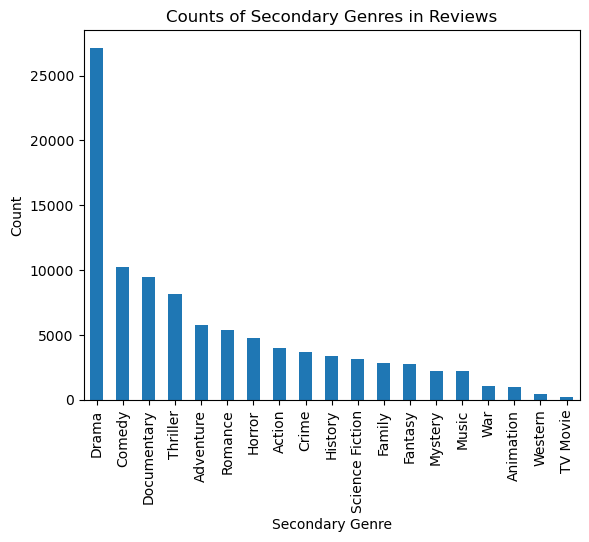

In [152]:
#Sec_genre analysis and possible cleaning
Reviews['Sec_genre'].value_counts().plot(kind='bar')

plt.title('Counts of Secondary Genres in Reviews')
plt.xlabel('Secondary Genre')
plt.ylabel('Count')

plt.show()

#This is a bar plot that shows the counts of each of the secodary genres of the movies, the top two genres are still 
#the most popular, but Documentary is now the third most popular secondary genre


Sec_genre_encoded = pd.get_dummies(Reviews, columns=['Sec_genre'])
#create the dummy variables for Sec_genre

In [84]:
#Secondary Genre analysis against reviewer_rating_actual


mean_ratings_by_sec_genre = Reviews.groupby('Sec_genre')['reviewer_rating_actual'].mean()

# Create a table of mean reviewer_rating_actual values by Sec_genre
print(mean_ratings_by_sec_genre)

#This shows the average reviewer_rating_actual values based on the Sec_genre of a movie
#The secondary genre with the hghest average reviwer rating is Western

Sec_genre
Action             0.126950
Adventure          0.261027
Animation          0.285517
Comedy             0.249991
Crime              0.200365
Documentary        0.349309
Drama              0.301551
Family             0.200887
Fantasy            0.167633
History            0.313439
Horror             0.222282
Music              0.316533
Mystery            0.182235
Romance            0.255100
Science Fiction    0.229279
TV Movie           0.322150
Thriller           0.209777
War                0.338306
Western            0.378961
Name: reviewer_rating_actual, dtype: float64


In [85]:
#Secondary genre analysis against ROI
mean_ROI_by_sec_genre = Reviews.groupby('Sec_genre')['ROI3'].mean()

# Create a table of mean reviewer_rating_actual values by Sec_genre
print(mean_ROI_by_sec_genre)


#This shows the average ROI values based on the Sec_genre of a movie
#The highest ROI for a secondary genre is mystery

Sec_genre
Action             0.991012
Adventure          2.459102
Animation          1.020593
Comedy             0.681261
Crime             -0.023228
Documentary       -0.980731
Drama              0.424561
Family             2.935159
Fantasy            0.962357
History            0.329104
Horror             1.080901
Music             -0.840081
Mystery            6.115938
Romance            0.872473
Science Fiction    2.313985
TV Movie          -1.000000
Thriller           0.957526
War                0.363619
Western           -0.717368
Name: ROI3, dtype: float64


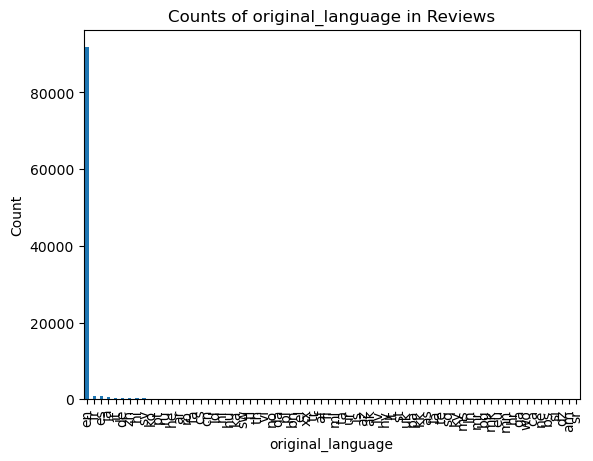

In [94]:
#original language analysis and cleaning
Reviews['original_language'].value_counts().plot(kind='bar')

plt.title('Counts of original_language in Reviews')
plt.xlabel('original_language')
plt.ylabel('Count')

plt.show()

#The preoportion of En movies is way higher than any other language, this variable should not be considered as a predictor

17.000747996358832
0.16972487798206884
                        tmdb_popularity_logged  reviewer_rating_actual
tmdb_popularity_logged                1.000000               -0.022658
reviewer_rating_actual               -0.022658                1.000000


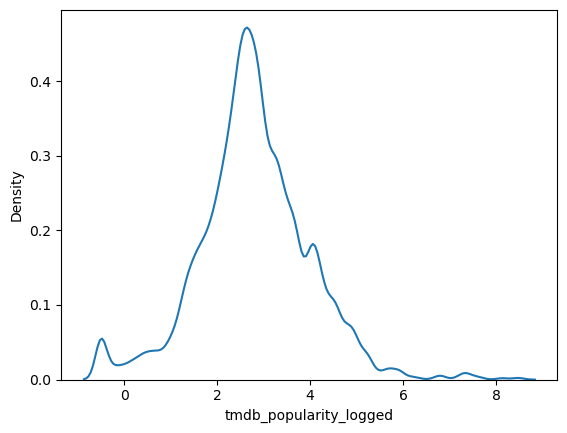

In [111]:
#Tmdb_popularity variable anaylsis and cleaning

#sns.kdeplot(data=Reviews["tmdb_popularity"]) #This is highly skewed to the right and may be logged
Reviews["tmdb_popularity_logged"] = np.log(Reviews["tmdb_popularity"])
print(stats.skew(Reviews["tmdb_popularity"])) #17.0007
print(stats.skew(Reviews["tmdb_popularity_logged"])) #0.1697
sns.kdeplot(data=Reviews["tmdb_popularity_logged"])


print(Reviews[['tmdb_popularity_logged', 'reviewer_rating_actual']].corr())
# -0.0022658


-2.793663847522248
                        tmdb_vote_avg  reviewer_rating_actual
tmdb_vote_avg                1.000000                0.100934
reviewer_rating_actual       0.100934                1.000000


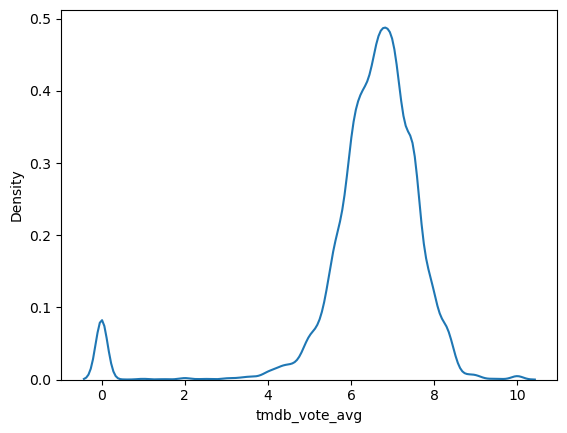

In [112]:
#Tmdb_vote_avg variable anaylsis and cleaning

sns.kdeplot(data=Reviews["tmdb_vote_avg"])
print(stats.skew(Reviews["tmdb_vote_avg"]))
#The skew of this variable is very high to the left, -2.7937

print(Reviews[['tmdb_vote_avg', 'reviewer_rating_actual']].corr())
# 0.100934

#multiple peaks, we cannot do a exp or log transform


3.0844601791045974
-1.2455586975075008
                        tmdb_vote_count_logged  reviewer_rating_actual
tmdb_vote_count_logged                1.000000               -0.000055
reviewer_rating_actual               -0.000055                1.000000


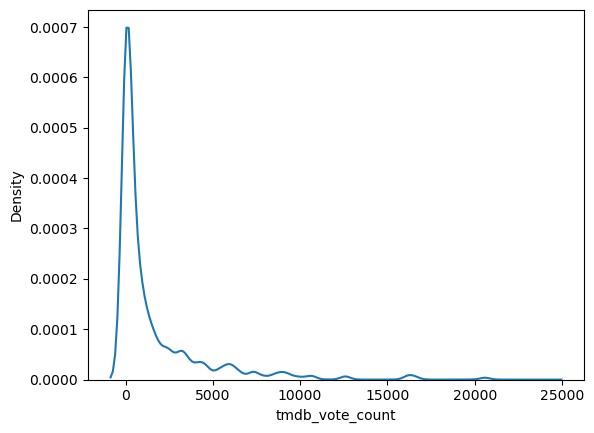

In [119]:
#Tmdb_vote_count variable anaylsis and cleaning

sns.kdeplot(data=Reviews["tmdb_vote_count"])
print(stats.skew(Reviews["tmdb_vote_count"]))
#The skew of this variable is very high to the right, 3.0845. We may log

Reviews["tmdb_vote_count_logged"] = np.log(Reviews["tmdb_vote_count"] + 0.01)
print(stats.skew(Reviews["tmdb_vote_count_logged"]))
#sns.kdeplot(data=Reviews["tmdb_vote_count_logged"])

print(Reviews[['tmdb_vote_count_logged', 'reviewer_rating_actual']].corr())
# 0.049837

#the correlation for the logged variable against rating is -0.000055, this is significantly lower
#We will likely not include the logged variable


<AxesSubplot:xlabel='Release_Year', ylabel='Density'>

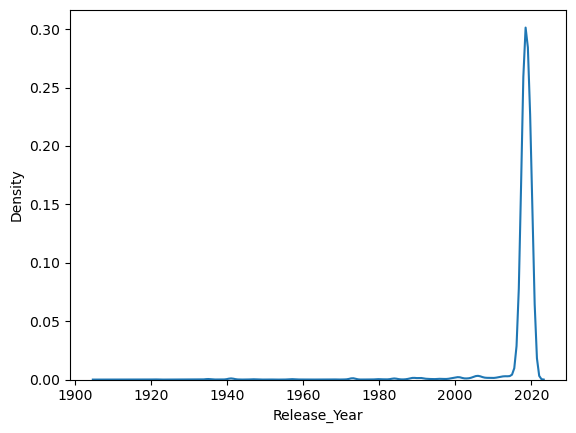

In [121]:
#release date changed to release
#This is hard to work with, we will split this into release month and release year


Reviews['release_date'] = pd.to_datetime(Reviews['release_date'])
Reviews['Release_Year'] = Reviews['release_date'].dt.strftime('%Y')
Reviews['Release_Month'] = Reviews['release_date'].dt.strftime('%m')

sns.kdeplot(data=Reviews["Release_Year"].astype(int))


<AxesSubplot:xlabel='Release_Year', ylabel='reviewer_rating_actual'>

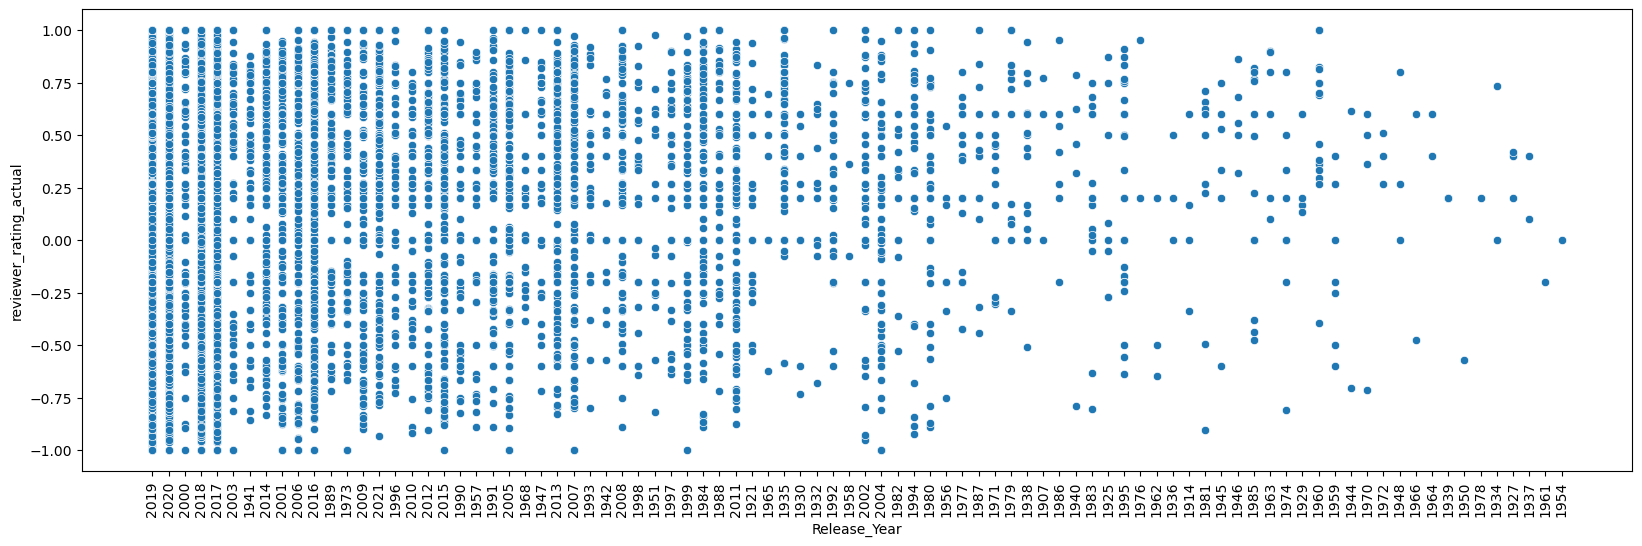

In [123]:
#release year to reviewer_rating_actual
fig = plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.scatterplot(x='Release_Year', y='reviewer_rating_actual', data=Reviews)
#There does not appear to be a super strong correlation. Therefore we will place this in the 
#possible predictors for reviewer_rating_actual


<AxesSubplot:xlabel='Release_Year', ylabel='ROI3'>

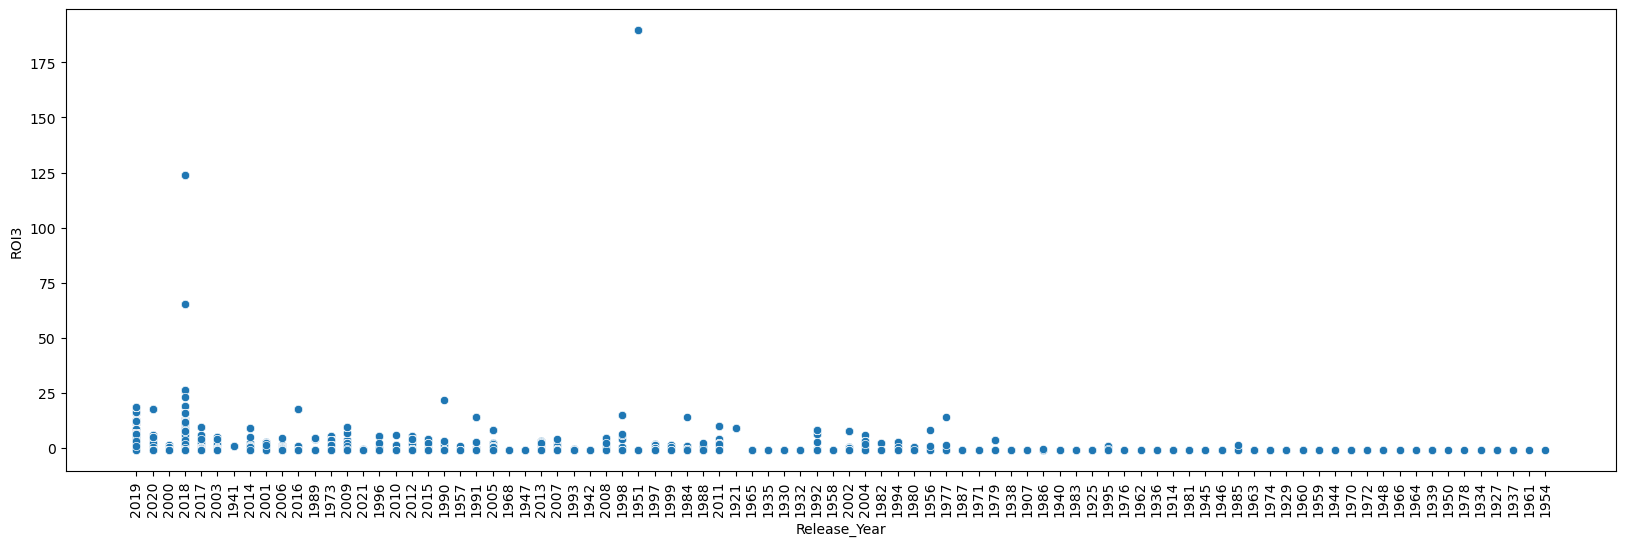

In [124]:
#release year to ROI
fig = plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.scatterplot(x='Release_Year', y='ROI3', data=Reviews)
#There is a slight positive correlation
#ROIs increase the later on you go, timewise


<AxesSubplot:xlabel='Release_Month', ylabel='Density'>

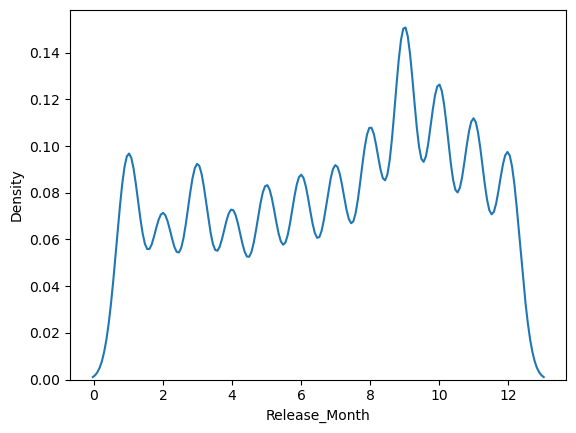

In [125]:
#release month distribution
sns.kdeplot(data=Reviews["Release_Month"].astype(int))
#expected distribution


<AxesSubplot:xlabel='Release_Month', ylabel='reviewer_rating_actual'>

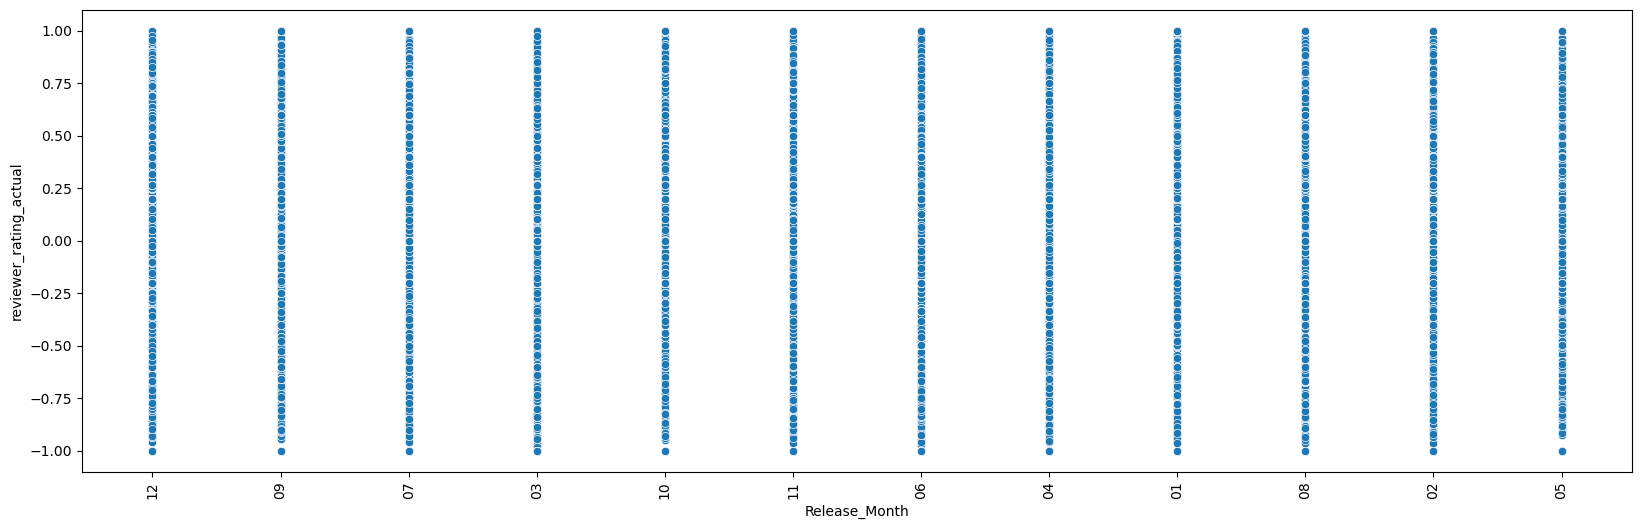

In [126]:
#release month to reviwer_rating_actual
fig = plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.scatterplot(x='Release_Month', y='reviewer_rating_actual', data=Reviews)
#No correlation, seems completely equal. Will still try for ROI


<AxesSubplot:xlabel='Release_Month', ylabel='ROI3'>

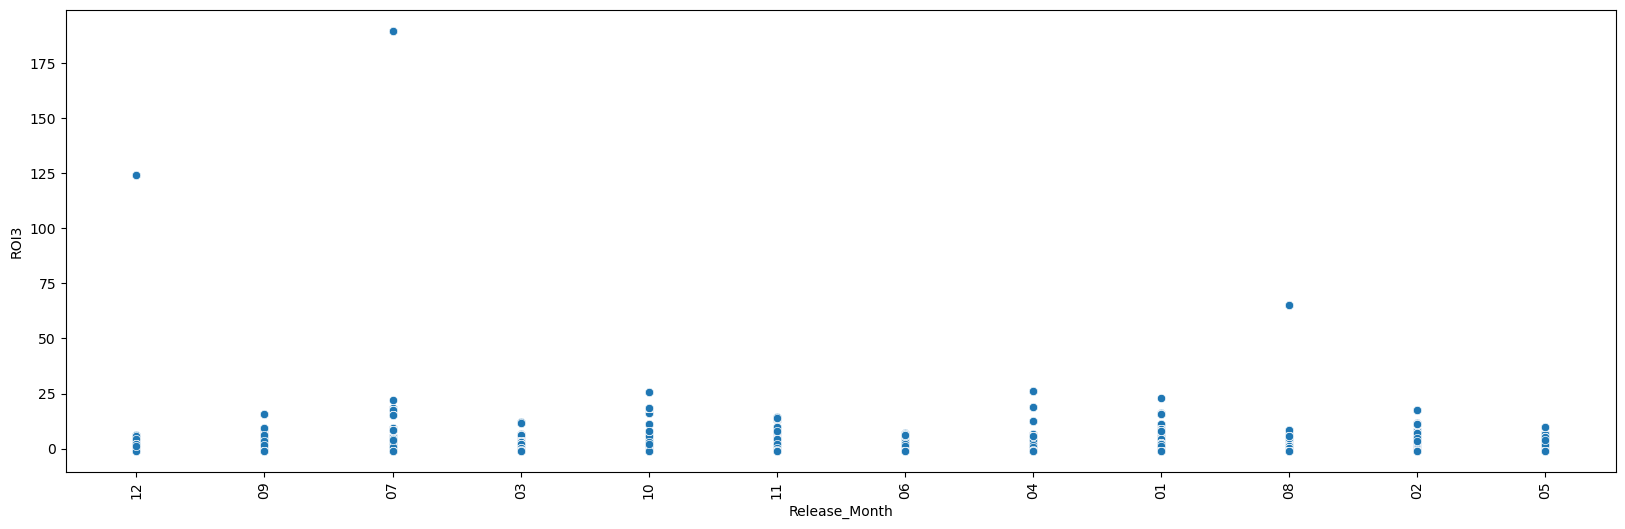

In [128]:
#release month to ROI
fig = plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.scatterplot(x='Release_Month', y='ROI3', data=Reviews)
#There seems to be a slight correlation between ROI and release Month



2.725685821493651


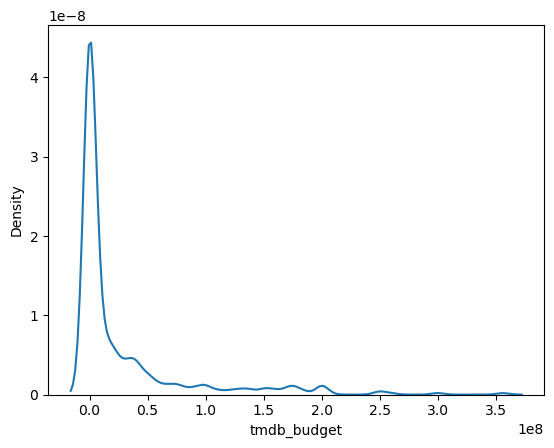

In [129]:
#budget analysis
sns.kdeplot(data=Reviews["tmdb_budget"])
#multiple peaks make it hard to transform
print(stats.skew(Reviews["tmdb_budget"])) 
#high skewness 2.73


In [134]:
#Imputing the medians before doing actual comparisons to reviewer_rating_actual
Reviews.loc[Reviews['tmdb_budget'] == 0, 'tmdb_budget'] = median_budget



In [136]:
print(Reviews[['tmdb_budget','reviewer_rating_actual']].corr())
#the correlation is low and may not be worth including


                        tmdb_budget  reviewer_rating_actual
tmdb_budget                 1.00000                 0.00079
reviewer_rating_actual      0.00079                 1.00000


4.837091636256252


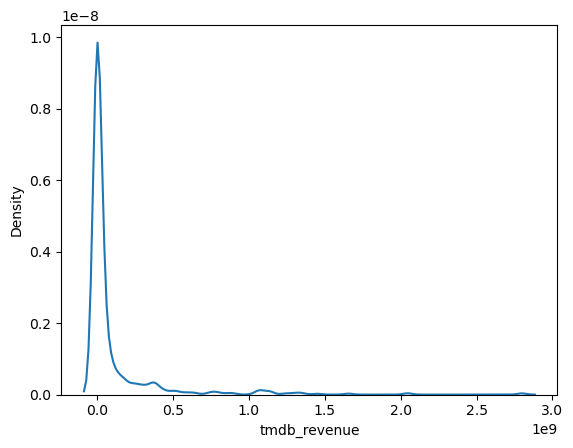

In [139]:
#revenue distribution
sns.kdeplot(data=Reviews["tmdb_revenue"])
#looks transformable
print(stats.skew(Reviews["tmdb_revenue"])) 
#high skewness 4.83
#tried logging, but corr went down a lot



In [141]:
print(Reviews[['tmdb_revenue','reviewer_rating_actual']].corr())
#low correlation, may not be worth including in th model

                        tmdb_revenue  reviewer_rating_actual
tmdb_revenue                1.000000                0.027945
reviewer_rating_actual      0.027945                1.000000


In [142]:
print(Reviews[['ROI4','reviewer_rating_actual']].corr())
#  0.083708 
#suprisingly low correlation
#we will still include it in both models


                            ROI4  reviewer_rating_actual
ROI4                    1.000000                0.083708
reviewer_rating_actual  0.083708                1.000000


In [228]:
#check cleaning
#print(Reviews.isna().sum()) #no NA values in our dvs or ivs

#some variables have type object and this may be causing errors
Reviews['Main_genre'] = Reviews['Main_genre'].astype(str)
Reviews['Sec_genre'] = Reviews['Sec_genre'].astype(str)
Reviews['Release_Year'] = Reviews['Release_Year'].astype(float)
Reviews['Release_Month'] = Reviews['Release_Month'].astype(float)

#Main_genre_encoded will need to get added in for the dummy vars
#Sec_genre_encoded will need to get added in for the dummy vars



In [260]:
#ROI model


Reviews['ROI3'] = Reviews['ROI3'].fillna(np.nan)
Reviews['Release_Year'] = Reviews['Release_Year'].astype(int)
Reviews['Release_Month'] = Reviews['Release_Month'].astype(int)
genre_dummies = pd.get_dummies(Reviews[['Main_genre', 'Sec_genre']])

# Concatenate the dummy columns with the rest of the features
X = pd.concat([Reviews[['reviewer_rating_actual', 'tmdb_vote_avg', 'Release_Month', 'Release_Year', 'tmdb_vote_count', 'tmeter', 'runtime', 'tmdb_popularity']], genre_dummies], axis=1)
Y = Reviews['ROI3']
reg = sm.OLS(Y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ROI3   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     756.1
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:20:55   Log-Likelihood:            -2.8185e+05
No. Observations:               97689   AIC:                         5.638e+05
Df Residuals:                   97644   BIC:                         5.642e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
reviewer_rating_actual        -0.0375      0.034     -1.104      0.270      -0.104       0.029
tmdb_vote_avg                  0.1983      0.011     17.692      0.000       0.176       0.220
Release_Month                 -0.0043      0.004     -1.016      0.309      -0.013       0.004
Release_Year                  -0.0376      0.002    -19.552      0.000      -0.041      -0.034
tmdb_vote_count                0.0008   6.37e-06    129.758      0.000       0.001       0.001
tmeter                         0.1327      0.040      3.295      0.001       0.054       0.212
runtime                       -0.0097      0.001    -12.950      0.000      -0.011      -0.008
tmdb_popularity               -0.0005   7.77e-05     -6.134      0.000      -0.001      -0.000
Main_genre_Action             37.3537      1.937     19.281      0.000      33.557      41.151
Main_genre_Adventure          36.0959      1.937     18.634      0.000      32.299      39.892
Main_genre_Animation          38.5556      1.934     19.936      0.000      34.765      42.346
Main_genre_Comedy             37.5283      1.938     19.361      0.000      33.729      41.327
Main_genre_Crime              37.3967      1.935     19.324      0.000      33.604      41.190
Main_genre_Documentary        37.3514      1.942     19.237      0.000      33.546      41.157
Main_genre_Drama              37.4585      1.938     19.327      0.000      33.660      41.257
Main_genre_Family             36.7876      1.945     18.911      0.000      32.975      40.600
Main_genre_Fantasy            37.5611      1.943     19.331      0.000      33.753      41.369
Main_genre_History            37.0957      1.941     19.115      0.000      33.292      40.899
Main_genre_Horror             38.4849      1.939     19.843      0.000      34.684      42.286
Main_genre_Music              39.0111      1.941     20.096      0.000      35.206      42.816
Main_genre_Mystery            37.0718      1.941     19.099      0.000      33.267      40.876
Main_genre_Romance            38.3416      1.939     19.771      0.000      34.541      42.143
Main_genre_Science Fiction    36.2621      1.939     18.706      0.000      32.463      40.062
Main_genre_TV Movie           37.3377      2.002     18.654      0.000      33.415      41.261
Main_genre_Thriller           40.3191      1.940     20.779      0.000      36.516      44.122
Main_genre_War                36.6757      1.944     18.862      0.000      32.865      40.487
Main_genre_Western            36.8967      1.944     18.984      0.000      33.087      40.706
Sec_genre_Action              36.5958      1.940     18.860      0.000      32.793      40.399
Sec_genre_Adventure           36.4019      1.939     18.770      0.000      32.601      40.203
Sec_genre_Animation           37.7543      

In [261]:
X.head(10)

,reviewer_rating_actual,tmdb_vote_avg,Release_Month,Release_Year,tmdb_vote_count,tmeter,runtime,tmdb_popularity,Main_genre_Action,Main_genre_Adventure,...,Sec_genre_History,Sec_genre_Horror,Sec_genre_Music,Sec_genre_Mystery,Sec_genre_Romance,Sec_genre_Science Fiction,Sec_genre_TV Movie,Sec_genre_Thriller,Sec_genre_War,Sec_genre_Western
0,-0.3164,7.4,12,2019,46.0,0.44,82.0,34.91,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3919,7.4,12,2019,46.0,0.44,82.0,34.91,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.2000,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.3182,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.5000,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
5,-0.1660,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
6,-0.1660,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0.3612,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0.6000,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0
9,-0.2000,7.1,9,2020,3887.0,0.72,115.0,358.17,0,1,...,0,0,0,0,0,0,0,0,0,0


In [262]:
#reviewer_rating_actual 1st model
X2 = pd.concat([Reviews[['ROI3', 'tmdb_vote_avg', 'tmdb_budget', 'tmdb_revenue', 'Release_Month', 'Release_Year', 'tmdb_vote_count', 'tmeter_cleaned', 'runtime', 'tmdb_popularity_logged']], genre_dummies], axis=1)
Y2 = Reviews['reviewer_rating_actual']
reg = sm.OLS(Y, X).fit()
reg.summary()

Y2 = Reviews['reviewer_rating_actual']
reg2 = sm.OLS(Y2, X2).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     reviewer_rating_actual   R-squared:                       0.125
Model:                                OLS   Adj. R-squared:                  0.125
Method:                     Least Squares   F-statistic:                     303.8
Date:                    Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                            12:21:00   Log-Likelihood:                -48655.
No. Observations:                   97689   AIC:                         9.740e+04
Df Residuals:                       97642   BIC:                         9.785e+04
Df Model:                              46                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ROI3                          -0.0004      0.000     -1.349      0.177      -0.001       0.000
tmdb_vote_avg                  0.0025      0.001      2.304      0.021       0.000       0.005
tmdb_budget                -2.173e-11   5.42e-11     -0.401      0.688   -1.28e-10    8.45e-11
tmdb_revenue               -2.895e-11   1.12e-11     -2.576      0.010    -5.1e-11   -6.92e-12
Release_Month                  0.0021      0.000      5.383      0.000       0.001       0.003
Release_Year                  -0.0001      0.000     -0.617      0.537      -0.000       0.000
tmdb_vote_count             9.373e-06   9.78e-07      9.584      0.000    7.46e-06    1.13e-05
tmeter_cleaned                 0.4501      0.005     95.480      0.000       0.441       0.459
runtime                        0.0005   6.99e-05      7.125      0.000       0.000       0.001
tmdb_popularity_logged        -0.0064      0.002     -4.180      0.000      -0.009      -0.003
Main_genre_Action              0.0512      0.182      0.282      0.778      -0.305       0.407
Main_genre_Adventure           0.0842      0.181      0.464      0.642      -0.271       0.440
Main_genre_Animation           0.0790      0.181      0.436      0.663      -0.276       0.434
Main_genre_Comedy              0.0593      0.182      0.326      0.744      -0.297       0.416
Main_genre_Crime               0.0796      0.182      0.438      0.661      -0.276       0.435
Main_genre_Documentary         0.0909      0.182      0.499      0.618      -0.266       0.448
Main_genre_Drama               0.0933      0.182      0.513      0.608      -0.263       0.450
Main_genre_Family              0.0495      0.182      0.272      0.786      -0.308       0.407
Main_genre_Fantasy             0.0890      0.182      0.489      0.625      -0.268       0.446
Main_genre_History             0.1177      0.182      0.647      0.518      -0.239       0.474
Main_genre_Horror              0.0655      0.182      0.360      0.719      -0.291       0.422
Main_genre_Music               0.0898      0.182      0.493      0.622      -0.267       0.447
Main_genre_Mystery             0.0777      0.182      0.426      0.670      -0.279       0.435
Main_genre_Romance             0.0779      0.182      0.428      0.668      -0.279       0.434
Main_genre_Science Fiction     0.0570      0.182      0.314      0.754      -0.299       0.413
Main_genre_TV Movie            0.1579      0.187      0.842      0.400      -0.209       0.525
Main_genre_Thriller            0.0526      0.182      0.289      0.772      -0.304       0.409
Main_genre_War                 0.1018      0.182      0.559      0.576      -0.255       0.459
Main_genre_Western             0.1049      0.182      0.576      0.565      -0.252       0.462

In [281]:
#reviewer_rating_actual 2nd model
#Take out ROI3, tmdb_revenue, Release_Year, tmdb_popularity, Main_genre variables, Sec_genre variables because they all had p-values 
#that were greater than 0.05. This means that these varaibles were not statistically significant predictors of 
#reviewer_rating_actual 

X3 = Reviews[['tmdb_vote_avg', 'tmdb_budget', 'Release_Month', 'tmdb_vote_count', 'tmeter_cleaned', 'runtime', 'tmdb_popularity_logged']]
Y3 = Reviews['reviewer_rating_actual']



Y3 = Reviews['reviewer_rating_actual']
reg3 = sm.OLS(Y3, X3).fit()
reg3.summary()

#Once we have removed all of the non-significant variables, the R2-adjusted significantly increased
#More varaince in the dataset is explained by our new model, this is an improvement

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     reviewer_rating_actual   R-squared (uncentered):                   0.364
Model:                                OLS   Adj. R-squared (uncentered):              0.364
Method:                     Least Squares   F-statistic:                              8002.
Date:                    Thu, 13 Apr 2023   Prob (F-statistic):                        0.00
Time:                            12:28:39   Log-Likelihood:                         -48846.
No. Observations:                   97689   AIC:                                  9.771e+04
Df Residuals:                       97682   BIC:                                  9.777e+04
Df Model:                               7                                                  
Covariance Type:                nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
tmdb_vote_avg             -0.0017      0.001     -1.832      0.067      -0.004       0.000
tmdb_budget            -1.821e-10   3.65e-11     -4.992      0.000   -2.54e-10   -1.11e-10
Release_Month              0.0021      0.000      5.588      0.000       0.001       0.003
tmdb_vote_count         8.553e-06   6.16e-07     13.896      0.000    7.35e-06    9.76e-06
tmeter_cleaned             0.4588      0.004    105.416      0.000       0.450       0.467
runtime                    0.0003   5.28e-05      6.107      0.000       0.000       0.000
tmdb_popularity_logged    -0.0118      0.001     -8.755      0.000      -0.014      -0.009
==============================================================================
Omnibus:                     4984.792   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5785.062
Skew:                          -0.580   Prob(JB):                         0.00
Kurtosis:                       3.275   Cond. No.                     2.25e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [279]:
ReviewsRev = Reviews[['reviewer_rating_actual', 'tmdb_vote_avg', 'tmdb_budget', 'Release_Month', 'tmdb_vote_count', 'tmeter_cleaned', 'runtime', 'tmdb_popularity_logged']]

In [291]:
#!pip install bioinfokit
from bioinfokit.visuz import stat
ReviewsRev[['yhat']]=pd.DataFrame(reg3.predict(X3)) #should this be ReviewsRev or X3
ReviewsRev['res']=pd.DataFrame(reg3.resid)
ReviewsRev['std_res']=reg3.get_influence().resid_studentized_internal


ReviewsRevResidPlot = stat.reg_resid_plot(df=ReviewsRev, yhat='yhat', resid='res', stdresid='std_res')





C:\Users\ethan\AppData\Local\Temp\ipykernel_17420\55817373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ReviewsRev[['yhat']]=pd.DataFrame(reg3.predict(X3)) #should this be ReviewsRev or X3
C:\Users\ethan\AppData\Local\Temp\ipykernel_17420\55817373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ReviewsRev['res']=pd.DataFrame(reg3.resid)
C:\Users\ethan\AppData\Local\Temp\ipykernel_17420\55817373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

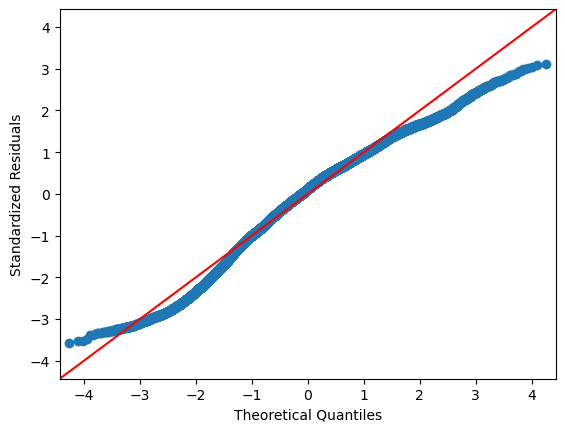

In [181]:
sm.qqplot(ReviewsRev['std_res'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
#normality of residuals looks fine

In [182]:
# Multicollinearity:
#don't want a correlation above 0.5 for predictors 
ReviewsRev.corr()

,ROI3,reviewer_rating_actual,tmdb_vote_avg,tmdb_budget,tmdb_revenue,Release_Month,Release_Year,tmdb_vote_count,tmeter,runtime,...,Sec_genre_Mystery,Sec_genre_Romance,Sec_genre_Science Fiction,Sec_genre_TV Movie,Sec_genre_Thriller,Sec_genre_War,Sec_genre_Western,yhat,res,std_res
ROI3,1.000000e+00,0.015539,1.611290e-01,8.468401e-02,3.454123e-01,-1.456692e-02,-6.985210e-02,4.250429e-01,4.855550e-02,1.222597e-01,...,1.613773e-01,4.132030e-03,5.515494e-02,-1.559552e-02,1.028208e-02,-8.627291e-03,-2.059714e-02,5.500519e-02,7.517773e-09,-1.046913e-05
reviewer_rating_actual,1.553883e-02,1.000000,1.009343e-01,7.898840e-04,2.794484e-02,4.254020e-02,1.352658e-02,4.983659e-02,2.484139e-01,6.025096e-02,...,-2.884620e-02,-4.520546e-03,-1.437872e-02,6.078457e-03,-3.779694e-02,1.808355e-02,1.870555e-02,2.824974e-01,9.592681e-01,9.592648e-01
tmdb_vote_avg,1.611290e-01,0.100934,1.000000e+00,1.328911e-01,1.973333e-01,7.512377e-02,1.737367e-02,2.855322e-01,3.009717e-01,3.100392e-01,...,-2.821346e-02,4.341155e-02,-1.754097e-02,1.029966e-03,-3.383576e-02,5.238170e-02,2.597021e-02,3.572928e-01,4.550340e-09,-4.147303e-06
tmdb_budget,8.468401e-02,0.000790,1.328911e-01,1.000000e+00,7.910805e-01,-2.443334e-02,5.842039e-02,6.526335e-01,1.329406e-02,3.220044e-01,...,-7.997840e-02,-7.211934e-02,1.282057e-01,-1.072727e-02,-7.125731e-02,-4.625056e-02,-2.516134e-02,2.796018e-03,1.687324e-08,1.400012e-06
tmdb_revenue,3.454123e-01,0.027945,1.973333e-01,7.910805e-01,1.000000e+00,-3.248555e-02,2.508537e-02,8.411576e-01,5.283039e-02,3.279707e-01,...,-3.165550e-02,-3.155151e-02,1.342853e-01,-1.569212e-02,-3.334607e-02,-2.856347e-02,-2.113353e-02,9.892062e-02,2.166167e-08,-1.177195e-06
Release_Month,-1.456692e-02,0.042540,7.512377e-02,-2.443334e-02,-3.248555e-02,1.000000e+00,-3.251179e-02,-1.998972e-02,4.174207e-02,1.012676e-01,...,-2.933107e-02,4.150840e-02,-4.700305e-02,-2.874065e-02,-2.267506e-02,6.426925e-02,2.341817e-02,1.505862e-01,-6.809863e-10,3.411183e-06
Release_Year,-6.985210e-02,0.013527,1.737367e-02,5.842039e-02,2.508537e-02,-3.251179e-02,1.000000e+00,-1.638329e-03,4.398246e-02,1.337203e-01,...,-1.627772e-02,-2.914738e-02,1.527043e-02,-1.633507e-03,2.689325e-02,8.246147e-03,-1.758109e-02,4.788213e-02,5.305146e-10,5.817693e-07
tmdb_vote_count,4.250429e-01,0.049837,2.855322e-01,6.526335e-01,8.411576e-01,-1.998972e-02,-1.638329e-03,1.000000e+00,8.891427e-02,4.074748e-01,...,-1.751702e-02,-2.079018e-02,8.121217e-02,-2.166902e-02,-5.866800e-03,-7.284397e-03,-2.034983e-02,1.764143e-01,1.824394e-08,-4.717118e-06
tmeter,4.855550e-02,0.248414,3.009717e-01,1.329406e-02,5.283039e-02,4.174207e-02,4.398246e-02,8.891427e-02,1.000000e+00,1.244342e-01,...,-3.921887e-02,-2.474499e-03,-2.388861e-02,5.653955e-03,-6.051227e-02,2.933791e-02,2.790864e-02,8.793495e-01,1.244084e-09,-1.374594e-05
runtime,1.222597e-01,0.060251,3.100392e-01,3.220044e-01,3.279707e-01,1.012676e-01,1.337203e-01,4.074748e-01,1.244342e-01,1.000000e+00,...,-2.727136e-02,2.455440e-02,3.221901e-02,-3.741613e-02,1.323042e-02,4.531843e-02,2.444852e-03,2.132797e-01,7.124864e-09,-3.655690e-06


In [292]:
ReviewsROI = pd.concat([Reviews[['ROI3', 'reviewer_rating_actual', 'tmdb_vote_avg',
                                 'tmdb_budget', 'tmdb_revenue', 'Release_Month', 
                                 'Release_Year', 'tmdb_vote_count', 'tmeter', 
                                 'runtime', 'tmdb_popularity']], genre_dummies], axis=1)

Y = Reviews['reviewer_rating_actual']
reg = sm.OLS(Y, ReviewsROI).fit()

ReviewsROI['yhat'] = pd.DataFrame(reg.predict(ReviewsROI)) 
ReviewsROI['res'] = pd.DataFrame(reg.resid)
ReviewsROI['std_res'] = reg.get_influence().resid_studentized_internal

ReviewsROIResidPlot = stat.reg_resid_plot(df=ReviewsROI, yhat='yhat', resid='res', stdresid='std_res')


In [251]:
# Multicollinearity:
ReviewsROI.corr()

,ROI3,reviewer_rating_actual,tmdb_vote_avg,tmdb_budget,tmdb_revenue,Release_Month,Release_Year,tmdb_vote_count,tmeter_cleaned,runtime,...,Sec_genre_Mystery,Sec_genre_Romance,Sec_genre_Science Fiction,Sec_genre_TV Movie,Sec_genre_Thriller,Sec_genre_War,Sec_genre_Western,yhat,res,std_res
ROI3,1.000000,0.015539,0.161129,0.084684,0.345412,-0.014567,-0.069852,0.425043,0.023003,0.122260,...,0.161377,0.004132,0.055155,-0.015596,0.010282,-0.008627,-0.020597,0.015539,0.085690,0.085707
reviewer_rating_actual,0.015539,1.000000,0.100934,0.000790,0.027945,0.042540,0.013527,0.049837,0.345296,0.060251,...,-0.028846,-0.004521,-0.014379,0.006078,-0.037797,0.018084,0.018706,1.000000,0.037000,0.036965
tmdb_vote_avg,0.161129,0.100934,1.000000,0.132891,0.197333,0.075124,0.017374,0.285532,0.235294,0.310039,...,-0.028213,0.043412,-0.017541,0.001030,-0.033836,0.052382,0.025970,0.100934,0.098868,0.098793
tmdb_budget,0.084684,0.000790,0.132891,1.000000,0.791081,-0.024433,0.058420,0.652633,-0.037435,0.322004,...,-0.079978,-0.072119,0.128206,-0.010727,-0.071257,-0.046251,-0.025161,0.000790,0.117523,0.117471
tmdb_revenue,0.345412,0.027945,0.197333,0.791081,1.000000,-0.032486,0.025085,0.841158,0.016643,0.327971,...,-0.031655,-0.031552,0.134285,-0.015692,-0.033346,-0.028563,-0.021134,0.027945,0.200655,0.200558
Release_Month,-0.014567,0.042540,0.075124,-0.024433,-0.032486,1.000000,-0.032512,-0.019990,0.056067,0.101268,...,-0.029331,0.041508,-0.047003,-0.028741,-0.022675,0.064269,0.023418,0.042540,-0.003184,-0.003140
Release_Year,-0.069852,0.013527,0.017374,0.058420,0.025085,-0.032512,1.000000,-0.001638,0.039208,0.133720,...,-0.016278,-0.029147,0.015270,-0.001634,0.026893,0.008246,-0.017581,0.013527,-0.010923,-0.010926
tmdb_vote_count,0.425043,0.049837,0.285532,0.652633,0.841158,-0.019990,-0.001638,1.000000,0.043967,0.407475,...,-0.017517,-0.020790,0.081212,-0.021669,-0.005867,-0.007284,-0.020350,0.049837,0.189332,0.189246
tmeter_cleaned,0.023003,0.345296,0.235294,-0.037435,0.016643,0.056067,0.039208,0.043967,1.000000,0.047997,...,-0.054336,-0.013293,-0.043939,0.027931,-0.087709,0.032220,0.033723,0.345296,-0.212137,-0.211919
runtime,0.122260,0.060251,0.310039,0.322004,0.327971,0.101268,0.133720,0.407475,0.047997,1.000000,...,-0.027271,0.024554,0.032219,-0.037416,0.013230,0.045318,0.002445,0.060251,0.077416,0.077422


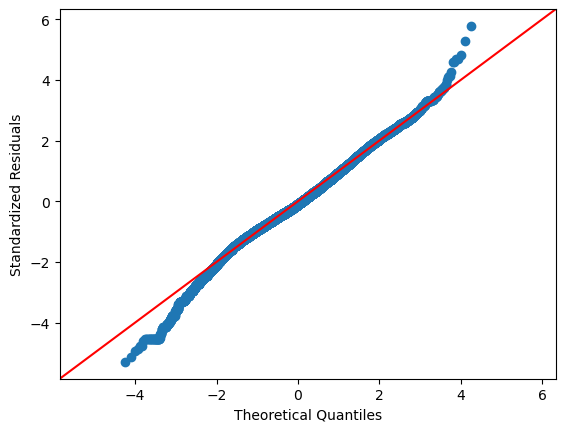

In [254]:
sm.qqplot(ReviewsROI['std_res'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#If you include tmeter_cleaned and tmdb_popularity_logged, then the qq plot is significantly changed